# 演習問題

In [25]:
%pip install japanize-matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

## 1. 基本的な計算

$2^{16}-1$を計算せよ．

In [27]:
2**16-1

65535

## 2. 変数

変数$x = 3, y = 4$を定義して，$x^2 + 2xy + y^2$を計算せよ．

In [28]:
x = 3
y = 4
ans = x**2 + 2*x*y + y**2 
ans

49

## 3. 実行制御

### 3.1) for文
for文を使って，$s = \displaystyle \prod_{i=1}^{8} 2$を計算せよ．また，この計算結果と同じ結果を得ることができる演算をプログラムで説明せよ．

In [29]:
s = 1
for i in range(8):
    s *= 2
s

256

In [30]:
s = 2 ** 8
s

256

In [31]:
def pow(x, n):
    if n == 0:
        return 1
    # other case
    if n % 2 == 0:
        return pow(x*x, n//2)
    else:
        return x * pow(x, n-1)

s = pow(2,8)
s

256

### 3.2) if文

$1$から$40$までの小さい順の整数に関して，$3$の倍数と$3$が付く整数には`aho`と表示し，$5$の倍数には`wan`と表示し，この2つの条件を満たす整数には`aho wan`と表示し，それ以外の整数にはその値を表示するプログラムを記述せよ．以下に出力の例を示す．

```
1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan
```

In [32]:
def is_three(num):
    if num % 3 == 0:
        return True
    elif '3' in str(num):
        return True
    else:
        return False

for i in range(1,41):
    if is_three(i) and i % 5 == 0:
        print("aho wan", end=' ')
    elif is_three(i):
        print("aho", end=' ')
    elif i % 5 == 0:
        print("wan", end=' ')
    else:
        print(i, end=' ')


1 2 aho 4 wan aho 7 8 aho wan 11 aho aho 14 aho wan 16 17 aho 19 wan aho 22 aho aho wan 26 aho 28 29 aho wan aho aho aho aho aho wan aho aho aho aho wan 

### 3.3) while文

[二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)を使い，$f(x) = x^2 - 2 = 0$の解を$|f(x)| < 10^{-8}$の精度で求めるプログラムを記述せよ．

In [33]:
ok = 1e8
ng = 0

def check(mid):
    if mid*mid - 2 > 0:
        return True
    else:
        return False

def check_fx(x):
    if abs(x*x - 2) < 1/1e8:
        return True
    else:
        return False

while(not check_fx(ok)):
    mid = (ok+ng)/2
    if check(mid):
        ok = mid
    else:
        ng = mid


print(ok)

1.414213562922484


## 4. 関数

### 4.1) 関数の定義

2つの引数$x$と$y$を受け取り，$x^2 + y^2$を戻り値とするsquare関数を定義し，$x = 3, y = 4$を引数としてsquare関数を呼び出せ．

In [34]:
def square(x, y):
    return x*x + y*y

square(3, 4)

25

### 4.2) 再帰関数

$x$と$y$を非負整数とする．以下の漸化式を再帰関数で実装し，$c_{8,6}$の値を求めよ．
$$
c_{x,y} = \begin{cases}
1 & (x = 0 \vee y = 0) \\
c_{x-1,y} + c_{x,y-1} & ({それ以外のとき}) \\
\end{cases}
$$

In [35]:
def cxy(x, y):
    if x == 0 or y == 0:
        return 1
    else:
        return cxy(x-1,y) + cxy(x, y-1)

print(cxy(8,6))

3003


### 4.3) 関数オブジェクト

方程式$f(x)=0$の解を[二分法](https://ja.wikipedia.org/wiki/%E4%BA%8C%E5%88%86%E6%B3%95)で求める関数bisectionを実装せよ．ただし，

+ 第1引数（`func`）は値$x$を引数に受け取り，関数の値$f(x)$を戻り値とする関数オブジェクト
+ 第2引数（`a`）は二分法を行う範囲の下限
+ 第3引数（`b`）は二分法を行う範囲の上限

とせよ．また，このbisection関数を用い，$f(x) = x^2 - 2 = 0$の解を求めよ（解は$|f(x)|<10^{-8}$くらいの精度で求めよ）．

In [36]:
def bisection(func, a, b):
    x = ( a + b ) / 2
    while True:
        if -1e-8 < func(x) < 1e-8:
            break
        if func(x) > 0:
            b, x = x, (a + x) / 2
        else:
            a, x = x, (b + x) / 2
    return x

def f(x):
    return x ** 2 - 2

a = 0
b = 10

print(bisection(f, a , b))

1.4142135623842478


## 5. リスト

### 5.1) リストへの要素の追加

$A$を$1$以上$20$以下の$2$の倍数を小さい順に並べたリスト，$B$を$1$以上$20$以下の$3$の倍数を小さい順に並べたリストとする．$A$と$B$の両方に含まれる要素を取り出し，空のリスト$C$に追加せよ．ただし，このプログラムではリスト以外のデータ構造（辞書や集合など）を用いないこととせよ．

In [37]:
A: list = []
for i in range(1,21):
    if i % 2 == 0:
        A.append(i)
B: list = []
for i in range(1,21):
    if i % 3 == 0:
        B.append(i)

C: list = []
for i in range(1,21):
    if i in A and i in B:
        C.append(i)
print(C)

[6, 12, 18]


### 5.2) リストの作成
$n = (0, 1, \dots, 16)$に対して$2^n$の値を並べたリストを作成せよ．

In [38]:
res: list = []
for i in range(17):
    res.append(2**i)
print(res)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]


### 5.3) 2次元配列

$x$と$y$を非負整数とする．以下の漸化式を[動的計画法](https://ja.wikipedia.org/wiki/%E5%8B%95%E7%9A%84%E8%A8%88%E7%94%BB%E6%B3%95)で実装し，$c_{8,6}$の値を求めよ．
$$
c_{x,y} = \begin{cases}
1 & (x = 0 \vee y = 0) \\
c_{x-1,y} + c_{x,y-1} & ({それ以外のとき}) \\
\end{cases}
$$

In [39]:
dp = [[0 for i in range(100)] for j in range(100)]
for i in range(100):
    dp[0][i] = 1
    dp[i][0] = 1

for i in range(1,100):
    for j in range(100):
        if i == 0 or j == 0:
            continue
        else:
            dp[i][j] = dp[i-1][j] + dp[i][j-1]

print(dp[8][6])

3003


## 6. 文字列

### 6.1) 「サスンリダッルパ」

「サスンリダッルパ」という文字列を定義し，その文字列の1,3,5,7文字目を取り出して連結した文字列を得よ．ただし，文字列の先頭の文字は０番目とする（先頭のインデックスは０）．

In [40]:
string: str = "サスンリダッルパ"
res_string: str = string[1] + string[3] + string[5] + string[7]
res_string

'スリッパ'

### 6.2) 「サンダル」＋「スリッパ」＝「サスンリダッルパ」

「サンダル」＋「スリッパ」の文字を先頭から交互に連結して文字列「サスンリダッルパ」を得よ．

In [41]:
string_left: str = "サンダル"
string_right: str = "スリッパ"

ans_string: str = ""
for i, c in enumerate(string_left):
    ans_string += c
    ans_string += string_right[i]

ans_string

'サスンリダッルパ'

### 6.3) フォーマット文字列

身長 (m) を変数`h`で表し，体重 (kg) を変数`w`で表すこととする．体重を身長の二乗で割ったBMI値を求め，身長と体重，BMIの値を「身長=###.#cm, 体重=##.#kg, BMI=##.##」というフォーマットの文字列に変換せよ．ただし，#は数字を表しており，身長と体重は小数点以下1位まで，BMIは小数点以下2位までの表示とせよ．たとえば，`h=1.8`, `w=80`のときは「身長=180.0cm, 体重=80.0kg, BMI=24.69」という文字列を作成したい．

In [42]:
def get_bmi(h: float, w: float):
    return "「身長={}cm, 体重={}kg, BMI={:02.2f}」".format(h*100, w, (w / (h ** 2)))

get_bmi(1.800, 80)

'「身長=180.0cm, 体重=80kg, BMI=24.69」'

### 6.4) 文字列の分割

"Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics."という文を単語に分解し，各単語の（アルファベットの）文字数を先頭から出現順に並べたリストを作成せよ．

In [43]:
string: str = "Now I need a drink, alcoholic of course, after the heavy lectures involving quantum mechanics."
ans: list = string.split(" ")
print(ans)

['Now', 'I', 'need', 'a', 'drink,', 'alcoholic', 'of', 'course,', 'after', 'the', 'heavy', 'lectures', 'involving', 'quantum', 'mechanics.']


### 6.5) Typoglycemia

スペースで区切られた単語列に対して，各単語の先頭と末尾の文字は残し，それ以外の文字の順序をランダムに並び替えるプログラムを作成せよ．ただし，長さが４以下の単語は並び替えないこととする．適当な英語の文（例えば"I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind ."）を与え，その実行結果を確認せよ．

In [44]:
string: str = "I couldn’t believe that I could actually understand what I was reading : the phenomenal power of the human mind ."
string_list: list = string.split(" ")

import random

ans: list = []
for string in string_list:
    if len(string) <= 4:
        ans.append(string)
        continue
    tmp: str = string[0]
    # operation
    mean_string: str = string[1:-1]
    # random sort 
    tmp += ''.join(random.sample(mean_string,len(mean_string)))
    # operation end
    tmp += string[-1]
    ans.append(tmp)
print(ans)

['I', 'c’ludont', 'bivleee', 'that', 'I', 'cuold', 'acutllay', 'unnsaetrdd', 'what', 'I', 'was', 'rndiaeg', ':', 'the', 'peaonnemhl', 'poewr', 'of', 'the', 'hmaun', 'mind', '.']


## 7. 辞書

### 7-1) 出現頻度
"neko no ko koneko, shishi no ko kojishi."という文字列から全ての文字（空白や記号を含む）の出現回数を計測せよ．

In [45]:
taraget_string: str = "neko no ko koneko, shishi no ko kojishi."
string_map: dict = {}
for c in taraget_string:
    if c in string_map:
        string_map[c] += 1
    else:
        string_map[c] = 1

print(string_map)

{'n': 4, 'e': 2, 'k': 6, 'o': 8, ' ': 7, ',': 1, 's': 3, 'h': 3, 'i': 4, 'j': 1, '.': 1}


### 7-2) ユニークなID番号への変換
"neko no ko koneko, shishi no ko kojishi."という文字列からスペース区切りで単語列（記号は単語から除去する）を取り出し，各単語をユニークなID番号の列に変換せよ．このとき，単語をID番号に変換するための辞書と，文字列をID番号列に変換した結果の両方を出力せよ．

In [46]:
string_list: list = taraget_string.split(" ")
string_dict: dict = {}
id:  int = 1000
for string in string_list:
    if string not in string_dict:
        string_dict[string] = id
        id += 1
    else:
        pass

print(string_dict)
ans: list = []
for string in string_list:
    ans.append(string_dict[string])

print(ans)

{'neko': 1000, 'no': 1001, 'ko': 1002, 'koneko,': 1003, 'shishi': 1004, 'kojishi.': 1005}
[1000, 1001, 1002, 1003, 1004, 1001, 1002, 1005]


## 8. ファイルの入出力

### 8.1) ファイルのダウンロード

東京都が公開している[新型コロナウイルス陽性患者のCSVファイル](https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv)をダウンロードせよ．

In [47]:
import numpy as np
import pandas as pd

url: str = "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv"

# csv_data = pd.read_csv(url)

In [48]:
# #  ダウンロードするなら

# import urllib.request

# url: str = "https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv"
# save_name: str = 'data.csv'

# urllib.request.urlretrieve(url, save_name)
!wget https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv

zsh:1: command not found: wget


In [49]:
import pandas as pd
import numpy as np
csv_data = pd.read_csv('tokyo_covid19_patients.csv')


### 8.2) CSVファイルの読み込み 

ダウンロードしたCSVファイルを読み込み，"患者_年代"列で示される年代別の感染者の総数を求めよ．

In [50]:
csv_data

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,確定_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_接触歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,NaN,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,NaN,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,NaN,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,NaN,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,NaN,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382319,377413,130001,東京都,NaN,2021-12-09,NaN,NaN,NaN,10代,女性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382320,377414,130001,東京都,NaN,2021-12-09,NaN,NaN,NaN,10歳未満,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382321,377415,130001,東京都,NaN,2021-12-09,NaN,NaN,NaN,10歳未満,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382322,377416,130001,東京都,NaN,2021-12-09,NaN,NaN,NaN,70代,男性,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
ans: dict = {}
for generation in csv_data["患者_年代"]:
    if generation not in ans:
        ans[generation] = 1
    else:
        ans[generation] += 1
print(ans)

{'40代': 60414, '30代': 75636, '70代': 13309, '50代': 45506, '80代': 9278, '60代': 18941, '20代': 110276, '10歳未満': 16742, '90代': 3162, '10代': 28892, '不明': 6, '-': 8, '100歳以上': 154}


### 8.3) CSVファイルの書き込み（難易度：高）

ダウンロードしたCSVファイルを読み込み，公表年月日ごとに各年代の感染者数を求め，CSVファイルに保存せよ．なお，余力があればデータが欠損している日付は感染者数が0人として埋めよ．作成されると期待されるファイルの冒頭部分を以下に示す．

```
公表年月日,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0,1
```

2020年12月2日現在で作成したファイルを[tokyo-covid.csv](tokyo-covid.csv)として保存してあるので，実行結果の確認用に用いるとよい．

In [52]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382324 entries, 0 to 382323
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   No            382324 non-null  int64  
 1   全国地方公共団体コード   382324 non-null  int64  
 2   都道府県名         382324 non-null  object 
 3   市区町村名         0 non-null       float64
 4   公表_年月日        382324 non-null  object 
 5   発症_年月日        248552 non-null  object 
 6   確定_年月日        356528 non-null  object 
 7   患者_居住地        382307 non-null  object 
 8   患者_年代         382324 non-null  object 
 9   患者_性別         382324 non-null  object 
 10  患者_職業         356526 non-null  object 
 11  患者_状態         0 non-null       float64
 12  患者_症状         0 non-null       float64
 13  患者_渡航歴の有無フラグ  0 non-null       float64
 14  患者_接触歴の有無フラグ  142620 non-null  float64
 15  備考            0 non-null       float64
 16  退院済フラグ        382107 non-null  float64
dtypes: float64(7), int64(2), object(8)
memory usage:

In [53]:
# 公表年月日にはnon-nullとの表記があるのでとくに処理を行う必要がない
# するなら pandas dataframeを直接用いるのが良さそう...
csv_data = csv_data.T

In [54]:
output: dict = {}

for id in range(len(csv_data.columns)):
    if csv_data[id]['公表_年月日'] not in output:
        output[csv_data[id]['公表_年月日']] = {}
        output[csv_data[id]['公表_年月日']][csv_data[id]['患者_年代']] = 1
        output[csv_data[id]['公表_年月日']]['合計'] = 1
    else:
        if csv_data[id]['患者_年代'] not in output[csv_data[id]['公表_年月日']]:
            output[csv_data[id]['公表_年月日']][csv_data[id]['患者_年代']] = 1
        else:
            output[csv_data[id]['公表_年月日']][csv_data[id]['患者_年代']] += 1
        output[csv_data[id]['公表_年月日']]['合計'] += 1

df = pd.DataFrame(output, index=['10歳未満','10代','20代','30代','40代','50代','60代','70代','80代','90代','100歳以上','不明','-','合計'])
df = df.T
df = df.fillna(0)

df.to_csv('output.csv', encoding='utf-8')
df


,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
2020-01-24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,0.0,1.0,4.0,2.0,6.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0
2021-12-06,0.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,7.0
2021-12-07,1.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,19.0
2021-12-08,1.0,4.0,6.0,2.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0


## 9. NumPy

### 9-1) ベクトルの作成

$n = 1, 2, 3, 4, 5$に対して，$1 / n^2$の値を数列として並べよ．

In [55]:
vector = np.array([1/(n*n) for n in range(1,6)])
print(vector)

[1.         0.25       0.11111111 0.0625     0.04      ]


### 9-2) ベクトルの和

$\sqrt{6 \displaystyle \sum_{n = 1}^{10000} \frac{1}{n^2}}$を計算せよ（[バーゼル問題](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%BC%E3%82%BC%E3%83%AB%E5%95%8F%E9%A1%8C)）．

In [56]:

ans = np.sqrt(6 * sum([1/(n*n) for n in range(1,10001)]))
print(ans)

3.1414971639472147


### 9-3) コサイン類似度

2つの位置ベクトル $\boldsymbol{u} = \left(\begin{array}{c}1 & 1 & 1\end{array}\right), \boldsymbol{v} = \left(\begin{array}{c}1 & 2 & 3\end{array}\right)$ のなす角を$\theta$とする．$\cos \theta$の値を求めよ．

In [57]:
u = np.array([1, 1, 1])
v = np.array([1, 2, 3])
u_v_dot = np.dot(u, v)

u_len = np.sqrt(sum([e**2 for e in list(u)]))
v_len = np.sqrt(sum([e**2 for e in list(v)]))

ans = u_v_dot / u_len / v_len
print(ans)

0.9258200997725515


In [58]:
from numpy import linalg as LA

i = np.inner(u, v)
n = LA.norm(u) * LA.norm(v)

c = i / n
# a = np.rad2deg(np.arccos(np.clip(c, -1.0, 1.0)))
print(c)

0.9258200997725515


### 9-4) ベクトルと行列の積

$X = \left(\begin{array}{c}
0 & 0 & 1  \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1 \\
\end{array}\right),
\boldsymbol{w} = \left(\begin{array}{c}
1 & 1 & -1.5
\end{array}\right)^\top$
に対して，$\max(X\boldsymbol{w}, \boldsymbol{0})$を計算せよ．ただし，$\max$は複数のベクトルを引数にとり，各要素ごとの最大値を返すものとする．

In [59]:
import numpy as np

X = np.array([[0, 0, 1],[0, 1, 1],[1, 0, 1],[1, 1, 1]])
w = np.array([1, 1, -1.5]).T


def self_max(vector1, vector2):
    if vector1.shape != vector2.shape:
        exit()
    else:
        if vector1.ndim == 1:
            h = vector1.size
            res: list = []
            for i in range(h):
                res.append(max(vector1[i], vector2[i]))
            return np.array(res)
        else:
            print('something')
            h, w = vector1.shape
            res: list = []
            for i in range(h):
                tmp: list = []
                for j in range(w):
                    tmp.append(max(vector1[i][j], vector2[i][j]))
                res.append(tmp)
            return np.array(res)
        

ans = self_max(np.dot(X,w), np.array([0]*4))
ans

array([0. , 0. , 0. , 0.5])

### 9-5) 行列の多項式（2007年京大文系入試問題）

$A = \left(\begin{array}{c}
2 & 4 \\
-1 & -1 \\
\end{array}\right),
E = \left(\begin{array}{c}
1 & 0 \\
0 & 1 \\
\end{array}\right)$とするとき，$A^6 + 2A^4 + 2A^3 + 2A^2 + 2A + 3E$を求めよ．

In [68]:
A = np.array([
    [2, 4],
    [-1, -1],
])
E = np.array([
    [1, 0],
    [0, 1],
])

ans = A ** 6 + 2 * (A ** 4) + 2 * (A ** 3) + 2 * (A ** 2) + 2 * (A) + 3 * E
ans
# 行列の累乗については、np.powのようなものを利用するべき


array([[ 127, 4776],
       [   1,    4]])

In [73]:
print((2*E)**3)

[[8 0]
 [0 8]]


## 10. グラフ

### 10-1) プロット

(1) $\displaystyle \lim_{x \to +0} x^x$を解析的に求め，その計算過程をMarkdownセルにLaTeX形式で記述せよ．

$$ \lim_{x \to +0} x^x = \lim_{x \to +0} (e ^ {\log x})^x = \lim_{x \to +0} e^{x \log x} $$
さらに
$$ \lim_{x \to +0} x \log x = \lim_{x \to +0} \frac{ \log x }{\frac{1}{x}} $$
なので、ロピタルの定理より
$$ \lim_{x \to +0} \frac{ \log x }{\frac{1}{x}} = \lim_{x \to +0} \frac{\frac{1}{x}}{- \frac{1}{x^2}} = \lim_{x \to +0}  - x \rightarrow 0$$
よって
$$ \lim_{x \to +0} e^{x \log x} \rightarrow 1$$

(2) $0 < x \leq 1$の範囲で関数$f(x) = x^x$のグラフを描き，$\displaystyle \lim_{x \to +0} x^x$を図示せよ．ただし，横軸は対数目盛とせよ．

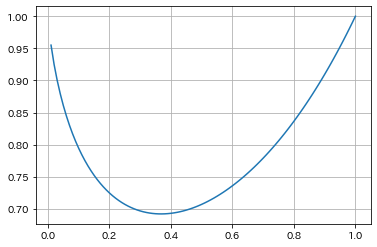

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# グラフがおかしい...
fig, ax = plt.subplots()
x = np.arange(1, 101, 1)
ax.plot(x/100, (x/100) ** (x/100))
ax.grid()
plt.show()

(3) $\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x$を解析的に求め，その計算過程をMarkdownセルにLaTeX形式で記述せよ．

$\displaystyle \lim_{x \to +0} (e ^ {- \frac{1}{x^2}})^x  = \lim_{x \to +0} (e ^ {\log (e ^ {- \frac{1}{x^2}})})^x = \lim_{x \to +0} e ^ {x \log (e ^ { \frac{1}{x^2}})}$ となる。
ここで、
$\displaystyle \lim_{x \to +0} x \log ( e ^ {- \frac{1}{x^2}} ) = \lim_{x \to +0} - \frac{1}{x} \rightarrow - \infty$
であるので、
$\displaystyle \lim_{x \to +0} (e ^ {- \frac{1}{x^2}})^x \rightarrow 0$

(4) $0 < x \leq 1$の範囲で関数$f(x) = \left(e^{-1/x^2}\right)^x$のグラフを描き，$\displaystyle \lim_{x \to +0} \left(e^{-1/x^2}\right)^x$を図示せよ．ただし，横軸は対数目盛とせよ．

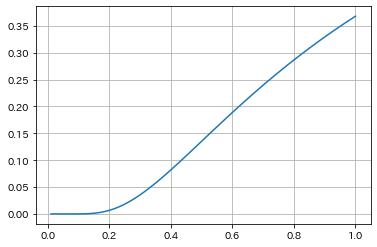

In [62]:

fig, ax = plt.subplots()
x = np.arange(1, 101, 1)
# np.arrange(0,1,0.00001)みたいのにもできるようです...へー
ax.plot(x/100, (np.e ** (- 1/ (x/100) ** (2))) ** (x/100))
ax.grid()
plt.show()

### 10-2) グラフ

In [63]:
!wget http://www.chokkan.org/temp/tokyo-covid.csv

zsh:1: command not found: wget


(1) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，年代別の感染者数の推移を折れ線グラフで表示せよ．

In [64]:
csv_data = pd.read_csv("tokyo-covid.csv")
csv_data

,公表年月日,10歳未満,10代,20代,30代,40代,50代,60代,70代,80代,90代,100歳以上,不明,-,合計
0,2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2020-11-28,12,31,132,102,90,83,50,37,20,4,0,0,0,561
310,2020-11-29,10,22,110,70,80,51,32,25,12,6,0,0,0,418
311,2020-11-30,7,17,68,51,69,32,27,14,23,3,0,0,0,311
312,2020-12-01,5,25,93,81,58,38,23,18,24,7,0,0,0,372


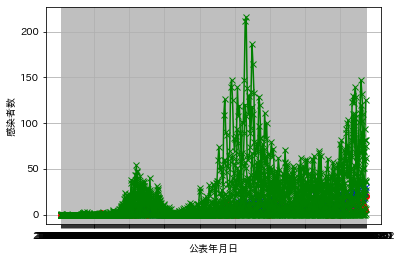

In [65]:
fig, ax = plt.subplots()
X = csv_data['公表年月日']
H = csv_data['10歳未満']
L = csv_data['10代']
L_data: list  = []
L_data.append(csv_data['20代'])
L_data.append(csv_data['30代'])
L_data.append(csv_data['40代'])
L_data.append(csv_data['50代'])
L_data.append(csv_data['60代'])
L_data.append(csv_data['70代'])
L_data.append(csv_data['80代'])
L_data.append(csv_data['90代'])
L_data.append(csv_data['100歳以上'])


ax.plot(X, H, 'o-r')
ax.plot(X, L, 'x-b')

for data in L_data:
    ax.plot(X, data, 'x-g')
ax.set_xlabel('公表年月日')
ax.set_ylabel('感染者数')
ax.grid()
plt.show()

(2) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，１日の感染者数を棒グラフで示せ．

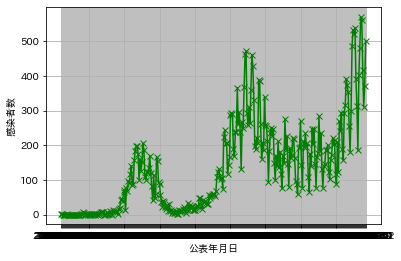

In [66]:
fig, ax = plt.subplots()
X = csv_data['公表年月日']
H = csv_data['合計']
ax.plot(X, H, 'x-g')
ax.set_xlabel('公表年月日')
ax.set_ylabel('感染者数')
ax.grid()
plt.show()

(2) 東京都のCOVID-19新規感染者報告数をCSV形式にまとめた[tokyo-covid.csv](tokyo-covid.csv)を読み込み，横軸を公表年月日，縦軸を感染者数として，１日の感染者数を折れ線グラフで示せ．このとき，7日間後方移動平均と14日間後方移動平均も折れ線グラフで示せ．

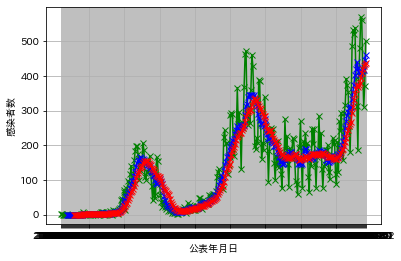

In [67]:
csv_data['7-days-mean'] = csv_data['合計'].rolling(7).mean().round(0)
csv_data['14-days-mean'] = csv_data['合計'].rolling(14).mean().round(0)

fig, ax = plt.subplots()
X = csv_data['公表年月日']
H = csv_data['合計']
mean7 = csv_data['7-days-mean']
mean14 = csv_data['14-days-mean']

ax.plot(X, H, 'x-g')
ax.plot(X, mean7, 'x-b')
ax.plot(X, mean14, 'x-r')

ax.set_xlabel('公表年月日')
ax.set_ylabel('感染者数')
ax.grid()
plt.show()